Prior to running these, have the annotated traing and validation images in two seperate folders. Within each, have a separate folder for images and labels with the original images in the images folder, and the annotation json files in the labels folder.

In [ ]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
import os
import shutil
from sklearn.model_selection import train_test_split
import zipfile

In [ ]:
drive.mount('/content/drive')
data_file = 'Anemia_dataset_train.xlsx'
images_folder_path = '/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/all' # change to where all pictures are stored

Mounted at /content/drive


In [ ]:
!ls /content/drive


MyDrive


In [ ]:
# filenames = [f for f in os.listdir(images_folder_path)]
# train_imgs, test_imgs = train_test_split(filenames, test_size=0.2, random_state=42)
# train_imgs, val_imgs = train_test_split(train_imgs, test_size=0.2, random_state=42)

In [ ]:
# print(len(train_imgs))
# print(len(val_imgs))
# print(len(test_imgs))

In [ ]:
# os.makedirs(os.path.join('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train'), exist_ok=True)
# os.makedirs(os.path.join('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val'), exist_ok=True)
# os.makedirs(os.path.join('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/test'), exist_ok=True)

In [ ]:
# for img in train_imgs:
#     shutil.move(os.path.join(images_folder_path, img), os.path.join('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train', img))
# for img in val_imgs:
#     shutil.move(os.path.join(images_folder_path, img), os.path.join('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val', img))
# for img in test_imgs:
#     shutil.move(os.path.join(images_folder_path, img), os.path.join('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/test', img))


In [ ]:
# !pip install labelme

In [ ]:
# import labelme

In [ ]:
# train_folder = '/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train'
# !labelme $train_folder

2024-11-22 16:05:47,409 [INFO   ] __init__:get_config:67- Loading config file from: /root/.labelmerc
QObject::moveToThread: Current thread (0x5b37f70ddaa0) is not the object's thread (0x5b37f84c17b0).
Cannot move to target thread (0x5b37f70ddaa0)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, linuxfb, minimal, offscreen, vnc, webgl.



In [ ]:
!pip install labelme2coco
import labelme2coco
from labelme2coco import convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 12.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=018785ce822c22a83a850b182cc9ef8549fc85affb73e64149c601cff8484098
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [ ]:
input_dir = "/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train_annot" # where the annotated json files are stored
output_file = "/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/coco_annotations.json" # where the final json file will be stored (will be called dataset.json)
convert(input_dir, output_file)

There are 101 listed files in folder train_annot.


Converting labelme annotations to COCO format: 100%|██████████| 101/101 [00:02<00:00, 37.39it/s]


In [ ]:
!pip install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 20.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


These directiories are where my actual images and labels file along with the dataset.json files are. Follow this structure

In [ ]:
import cv2
import json
import os

def convert_yolact_to_yolo(yolact_json, image_dir, output_dir, class_mapping):
    with open(yolact_json, 'r') as f:
        data = json.load(f)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image in data['images']:
        image_id = image['id']
        image_name = os.path.basename(image['file_name'])
        image_width = image['width']
        image_height = image['height']

        annotations = [
            ann for ann in data['annotations'] if ann['image_id'] == image_id
        ]

        # change this to fit the classes that you have, check the converted file, probably will be the same
        class_mapping = {
            'n': 0,  # fingernail (example)
            'a': 1,  # blue circle (example)
            'i': 2   # color card (example)
            }

        label_file = os.path.join(output_dir, f"{os.path.splitext(image_name)[0]}.txt")
        with open(label_file, 'w') as f_out:
            for ann in annotations:
                category_id = ann['category_id']
                bbox = ann['bbox']  # x_min, y_min, width, height

                # Convert to YOLO format
                x_center = (bbox[0] + bbox[2] / 2) / image_width
                y_center = (bbox[1] + bbox[3] / 2) / image_height
                width = bbox[2] / image_width
                height = bbox[3] / image_height

                class_id = category_id  # Map to YOLO class ID
                f_out.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

image_dir = '/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train/images'
output_dir = '/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train/labels'
convert_yolact_to_yolo('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/dataset.json', image_dir, output_dir, 'nail')

In [ ]:
image_dir2 = '/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val/images'
output_dir2 = '/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val/labels'
convert_yolact_to_yolo('/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/dataset.json', image_dir2, output_dir2, 'nail')

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
# Specify the YAML content (change the names to what you annotated with)
yaml_content = """
train: /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train/images
val: /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val/images

nc: 3
names: ['nail', 'colorcard', 'bluecircle']
"""

# Create and write to the YAML file
with open('/content/dataset.yaml', 'w') as file:
    file.write(yaml_content)

print("YAML file created successfully!")

YAML file created successfully!


In [ ]:
model = YOLO('yolov8n.pt')
model.train(data='/content/dataset.yaml', epochs=50, imgsz=1024)

100%|██████████| 6.25M/6.25M [00:00<00:00, 83.5MB/s]


Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train/labels... 86 images, 1 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:40<00:00,  2.12it/s]

train: New cache created: /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.44G      1.008       3.53      1.295         37       1024: 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all         15         86    0.00718      0.449     0.0508     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       5.3G     0.8534       2.76      1.113         52       1024: 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         15         86     0.0137      0.586       0.31      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       5.3G     0.8196      1.568      1.094         32       1024: 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         15         86      0.796      0.392      0.608      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.29G     0.7746      1.266      1.008         43       1024: 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15         86     0.0257      0.815      0.533      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.27G     0.7689      1.226      1.015         37       1024: 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         15         86          1      0.257      0.533      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.31G     0.7709     0.9969      1.005         46       1024: 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         15         86      0.995      0.333      0.629      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.31G     0.7373     0.9312      0.988         50       1024: 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         15         86      0.997      0.333      0.772      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.27G     0.7485     0.9119     0.9908         66       1024: 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15         86      0.981      0.376      0.882      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.28G      0.776     0.8907      1.005         53       1024: 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         15         86      0.997      0.311      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.31G     0.7204     0.8244     0.9702         62       1024: 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         15         86      0.829      0.504      0.993      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.29G     0.7282     0.8176     0.9926         47       1024: 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         86      0.765      0.854      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.27G     0.6923     0.7894     0.9632         56       1024: 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         15         86      0.747      0.768      0.986      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.28G     0.6945     0.7869     0.9764         55       1024: 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         15         86      0.783      0.854      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.31G     0.7119     0.7586     0.9736         54       1024: 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         15         86      0.728      0.859      0.883      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.28G     0.7213     0.7902     0.9824         42       1024: 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         15         86       0.69      0.758      0.833      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.34G     0.7013      0.765     0.9422         74       1024: 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         15         86      0.877      0.966      0.933      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.31G       0.69      0.737     0.9687         61       1024: 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         15         86      0.947      0.976      0.985      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.27G      0.684     0.7169     0.9708         55       1024: 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         15         86      0.973      0.994      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.3G     0.6745     0.7279     0.9625         44       1024: 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15         86      0.966      0.988      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.27G     0.6806     0.7396     0.9687         57       1024: 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         15         86      0.963      0.983      0.989       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.31G     0.6786     0.6988     0.9524         45       1024: 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         15         86      0.955      0.982      0.981      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.28G     0.6865     0.7174      0.959         69       1024: 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         15         86      0.973      0.988      0.991      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.31G     0.6496     0.6451     0.9379         64       1024: 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         15         86      0.982      0.988      0.994      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.28G      0.624     0.6368     0.9329         58       1024: 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         15         86      0.984       0.99      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.31G     0.6557     0.6444     0.9488         57       1024: 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15         86      0.982      0.994      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.33G     0.6326     0.6534     0.9502         67       1024: 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         15         86      0.975       0.99      0.994       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.31G     0.6248     0.6369     0.9358         48       1024: 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         15         86      0.975      0.991      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.27G     0.6374     0.6192      0.945         64       1024: 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         15         86       0.98      0.992      0.991      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.27G     0.6234     0.6186     0.9516         40       1024: 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         15         86      0.979      0.993      0.991      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.28G     0.6303     0.5876     0.9249         60       1024: 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         15         86      0.986      0.995      0.993      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.34G     0.6009     0.5873     0.9351         90       1024: 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         15         86      0.987      0.994      0.993      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.25G     0.6099     0.6079     0.9553         41       1024: 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15         86      0.981      0.993      0.994      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.26G     0.6122      0.599     0.9323         61       1024: 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         15         86      0.973      0.994      0.994      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.31G     0.5919     0.6003     0.9422         60       1024: 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         15         86      0.986      0.988      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.28G     0.5718     0.5682     0.9327         65       1024: 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         15         86       0.99      0.988      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.3G     0.5562     0.5487     0.9026         50       1024: 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         15         86      0.982      0.989      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.28G     0.5531     0.5331      0.914         61       1024: 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         15         86      0.982      0.989      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.33G     0.5713     0.5283     0.9172         54       1024: 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         15         86      0.983      0.989      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.29G      0.565     0.5266     0.9265         60       1024: 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15         86      0.986      0.988      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.27G      0.557     0.5254     0.9149         47       1024: 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15         86      0.984      0.989      0.995      0.885


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.19G     0.5512     0.6252     0.9393         34       1024: 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         15         86      0.977      0.992      0.994      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.19G     0.5166     0.6196      0.888         28       1024: 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         15         86      0.967      0.993      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.19G     0.5295     0.6001     0.9122         35       1024: 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         15         86      0.979      0.987      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.19G     0.5041     0.5868     0.9081         34       1024: 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         15         86      0.985      0.988      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.19G     0.5026     0.5654     0.8958         36       1024: 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         15         86      0.989      0.988      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.19G     0.5262     0.5735     0.9046         35       1024: 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         15         86      0.991      0.988      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.19G     0.5094      0.555     0.8866         36       1024: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         15         86      0.988      0.988      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.19G     0.4911     0.5425     0.9061         33       1024: 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         15         86      0.989      0.994      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.19G     0.4797     0.5416     0.8891         33       1024: 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         15         86      0.994      0.994      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.19G     0.4782     0.5304     0.8945         34       1024: 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         15         86      0.989      0.988      0.995      0.893



50 epochs completed in 0.068 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


                   all         15         86      0.991      0.988      0.995      0.901
                  nail         15         56      0.993      0.964      0.994      0.805
             colorcard         15         15      0.987          1      0.995      0.995
            bluecircle         15         15      0.991          1      0.995      0.902
Speed: 0.6ms preprocess, 5.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac8f4d3e4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model.val(data='/content/dataset.yaml', imgsz=1024)

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/val/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


                   all         15         86      0.991      0.988      0.995      0.896
                  nail         15         56      0.993      0.964      0.994      0.805
             colorcard         15         15      0.987          1      0.995      0.986
            bluecircle         15         15      0.991          1      0.995      0.898
Speed: 0.6ms preprocess, 13.3ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac8f54cbfd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

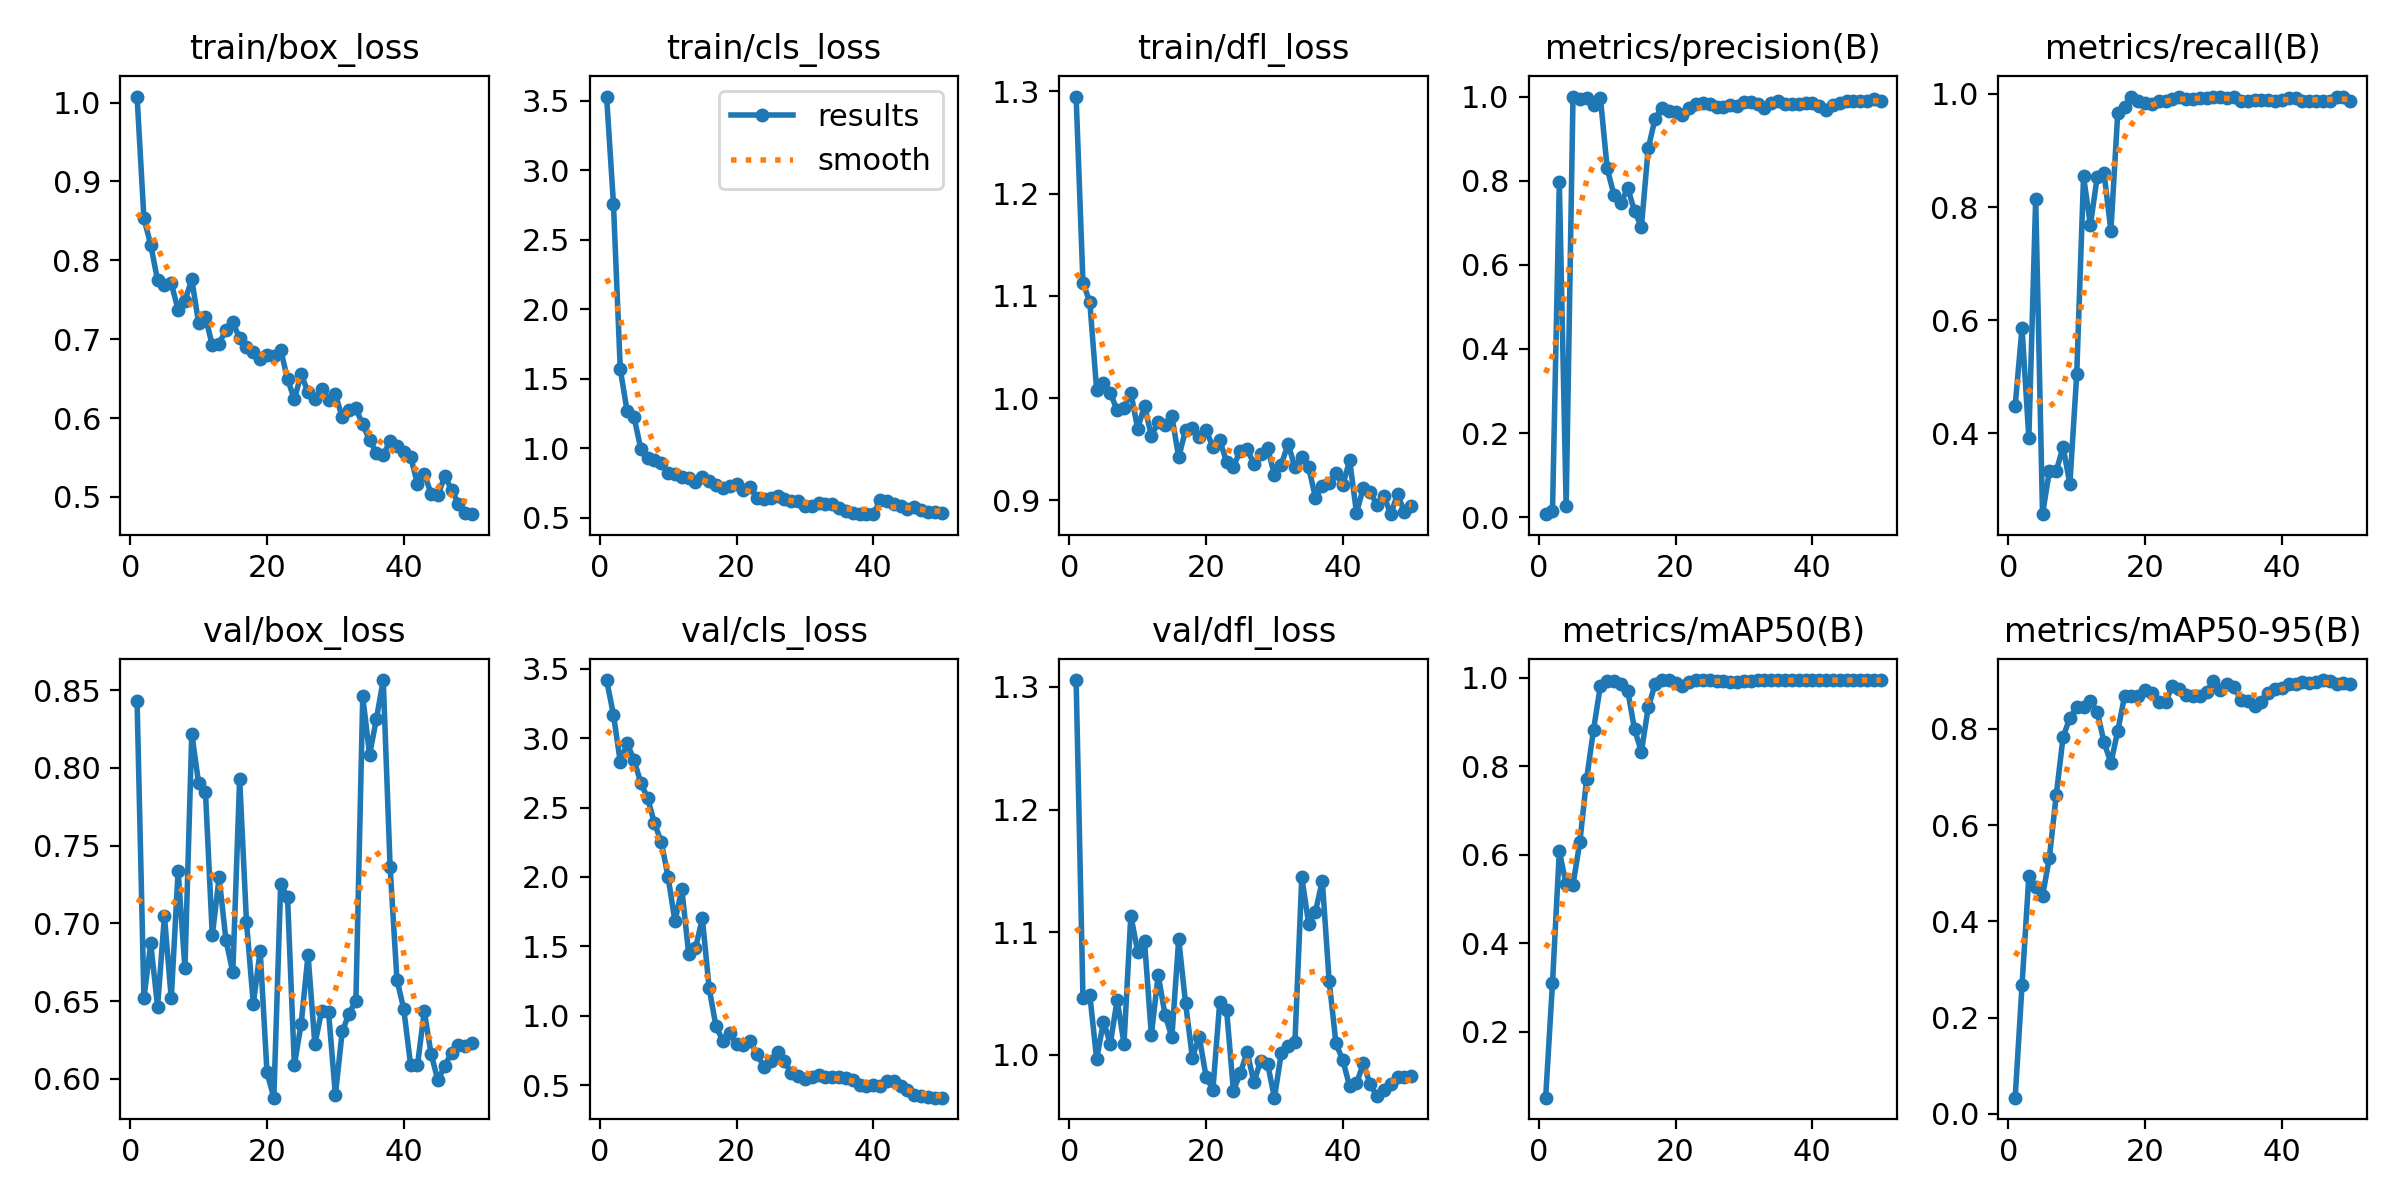

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/detect/train/results.png'))

In [ ]:
results = model.predict(source='/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/test/1709620482923.jpg', save=True, imgsz=640)


image 1/1 /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/test/1709620482923.jpg: 640x640 4 nails, 1 colorcard, 1 bluecircle, 7.5ms
Speed: 5.2ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3


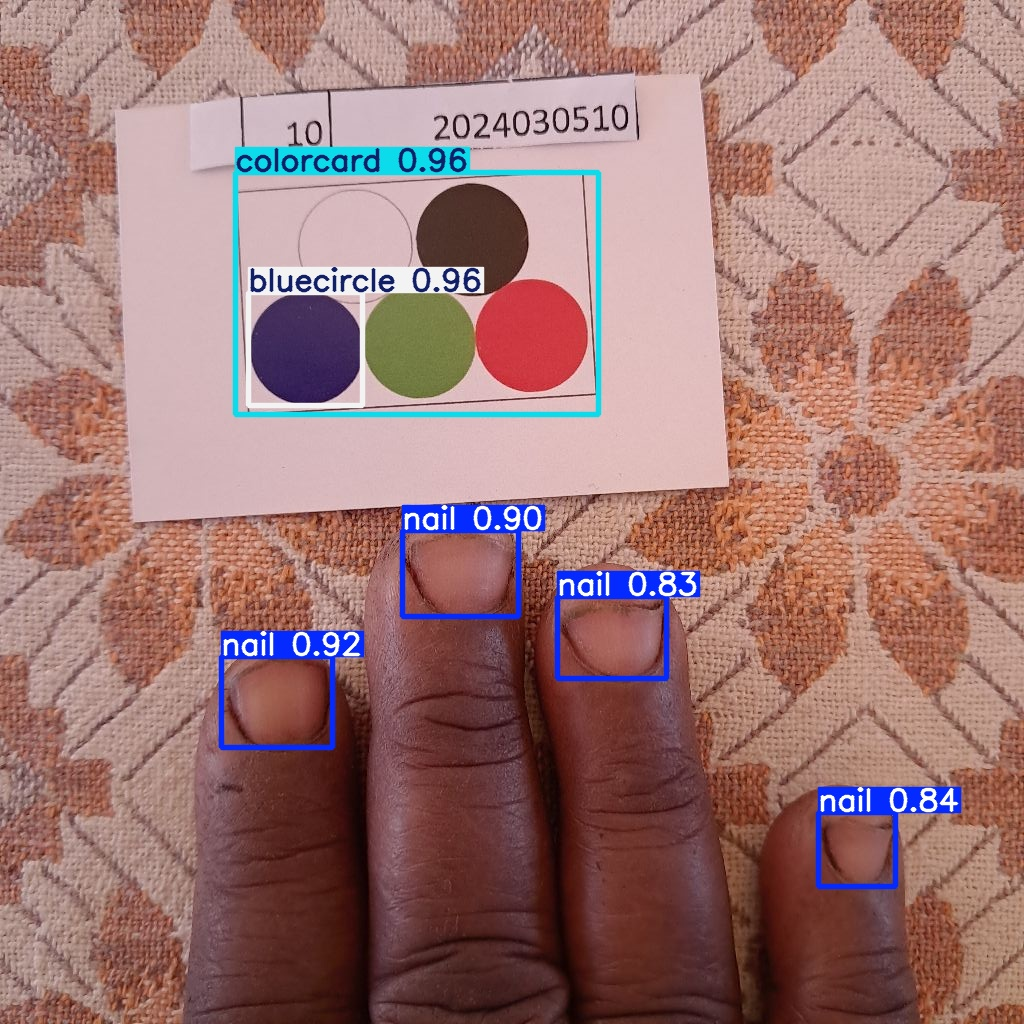

In [ ]:
from IPython.display import Image
display(Image(filename='runs/detect/train3/1709620482923.jpg'))

In [ ]:
results = model.predict(source='/content/drive/MyDrive/AI_ML_Project/Right_Fingernail/test/1709722167262.jpg', save=True, imgsz=640)


image 1/1 /content/drive/MyDrive/AI_ML_Project/Right_Fingernail/test/1709722167262.jpg: 640x640 4 nails, 1 colorcard, 1 bluecircle, 7.6ms
Speed: 3.2ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train4


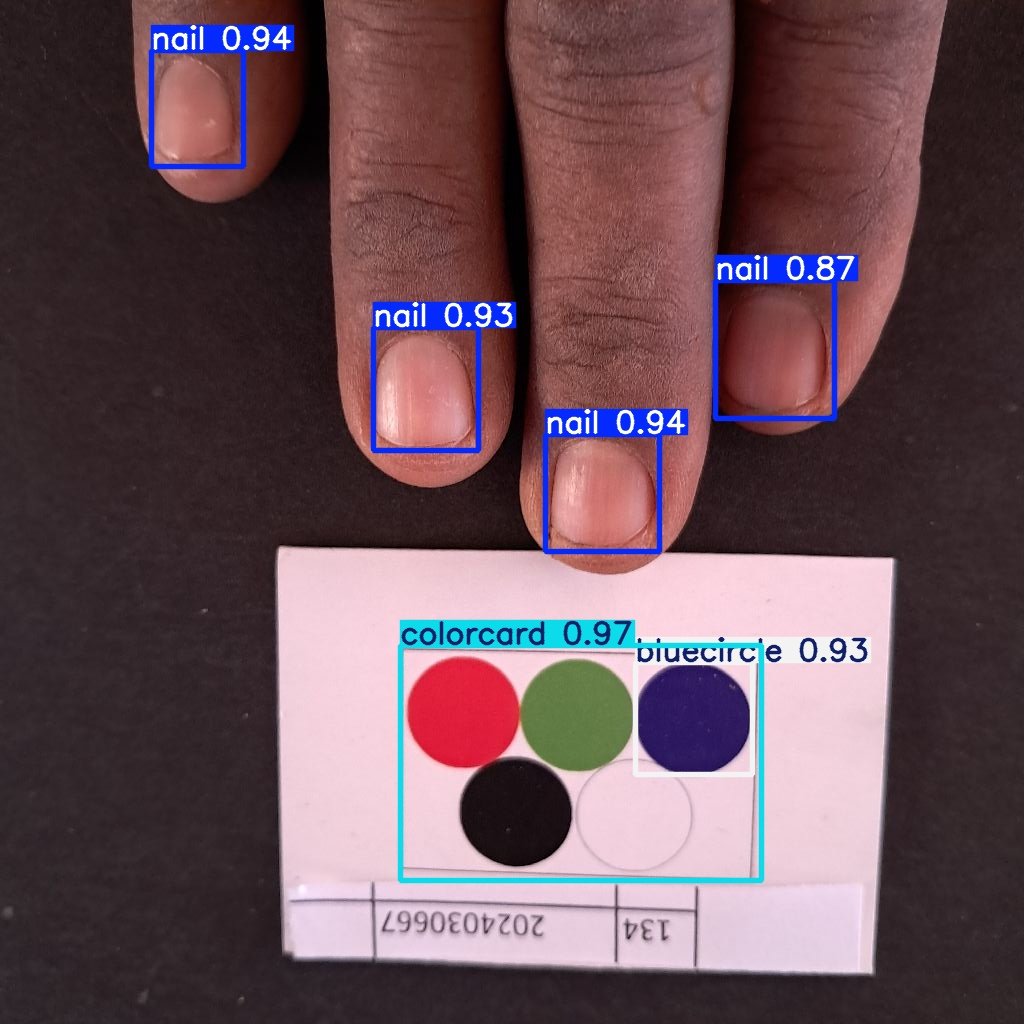

In [ ]:
from IPython.display import Image
display(Image(filename='runs/detect/train4/1709722167262.jpg'))

In [ ]:
from google.colab import files
model_path = 'runs/detect/train/weights/best.pt'  # Adjust to your model's path (this saves the model)
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>